### Importing Libaries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Import the data

In [2]:
df=pd.read_csv("train.csv")

In [3]:
def cns_desc(x):
    if x<300:
        return 0
    elif (x>=300) and (x<=350):
        return 1
    elif (x>350) and (x<=570):
        return 2
    elif (x>570) and (x<=630):
        return 3
    elif (x>630) and (x<=705):
        return 4
    else:
        return 5

In [4]:
df["Date.of.Birth"]=pd.to_datetime(df["Date.of.Birth"])

df["DisbursalDate"]=pd.to_datetime(df["DisbursalDate"])
df["DisbursalDate_Month"]=df["DisbursalDate"].dt.month

df["Age_at_disbursement"]=((df['DisbursalDate']-df["Date.of.Birth"])/365).apply(lambda x:x.days)

df["Employment.Type"]=df["Employment.Type"].map({'Salaried':0,"Self employed":1,np.nan:2})

df["PERFORM_CNS.SCORE.DESCRIPTION"]=df["PERFORM_CNS.SCORE"].apply(cns_desc)

df["AVERAGE.ACCT.AGE"]=df["AVERAGE.ACCT.AGE"].apply(lambda x:(int((x.split("y"))[0])*12)+(int((x.split())[1].split("m")[0])))

df["CREDIT.HISTORY.LENGTH"]=df["CREDIT.HISTORY.LENGTH"].apply(lambda x:(int((x.split("y"))[0])*12)+(int((x.split())[1].split("m")[0])))

In [5]:
df['NO.OF.ACCTS']=df['PRI.NO.OF.ACCTS']+df['SEC.NO.OF.ACCTS']
df['ACTIVE.ACCTS']=df['PRI.ACTIVE.ACCTS']+df['SEC.ACTIVE.ACCTS']
df['OVERDUE.ACCTS']=df['PRI.OVERDUE.ACCTS']+df['SEC.OVERDUE.ACCTS']
df['CURRENT.BALANCE']=df['PRI.CURRENT.BALANCE']+df['SEC.CURRENT.BALANCE']
df['SANCTIONED.AMOUNT']=df['PRI.SANCTIONED.AMOUNT']+df['SEC.SANCTIONED.AMOUNT']
df['DISBURSED.AMOUNT']=df['PRI.DISBURSED.AMOUNT']+df['SEC.DISBURSED.AMOUNT']
df['INSTAL.AMT']=df['PRIMARY.INSTAL.AMT']+df['SEC.INSTAL.AMT']

df=df.drop(['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','SEC.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','SEC.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','SEC.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT'],axis=1)

In [7]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION               6
NEW.ACCTS.IN.LAST.SIX.MONTHS      

In [8]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'DisbursalDate_Month', 'Age_at_disbursement', 'NO.OF.ACCTS',
       'ACTIVE.ACCTS', 'OVERDUE.ACCTS', 'CURRENT.BALANCE', 'SANCTIONED.AMOUNT',
       'DISBURSED.AMOUNT', 'INSTAL.AMT'],
      dtype='object')

In [6]:
df=df.drop(columns=['Date.of.Birth',"DisbursalDate"])

In [7]:
cols=df.columns.to_list()

In [8]:
cat_cols=['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','Employment.Type', 'State_ID',
          'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag','Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE.DESCRIPTION','DisbursalDate_Month']

In [9]:
target_col="loan_default"

In [10]:
num_cols=['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','NEW.ACCTS.IN.LAST.SIX.MONTHS',
          'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','NO.OF_INQUIRIES',
          'Age_at_disbursement','NO.OF.ACCTS','ACTIVE.ACCTS','OVERDUE.ACCTS','CURRENT.BALANCE','SANCTIONED.AMOUNT',
             'DISBURSED.AMOUNT','INSTAL.AMT']

In [11]:
df[cat_cols].nunique()

UniqueID                         233154
branch_id                            82
supplier_id                        2953
manufacturer_id                      11
Current_pincode_ID                 6698
Employment.Type                       3
State_ID                             22
Employee_code_ID                   3270
MobileNo_Avl_Flag                     1
Aadhar_flag                           2
PAN_flag                              2
VoterID_flag                          2
Driving_flag                          2
Passport_flag                         2
PERFORM_CNS.SCORE.DESCRIPTION         6
DisbursalDate_Month                  12
dtype: int64

As we see no of unique elements in some categorical columns is higher,we couldn't take dummies as it will cause curse of 
dimensionality.Let's drop them.

In [15]:
linear_models_df=df.copy()

In [16]:
linear_models_df=linear_models_df.drop(columns=['UniqueID','supplier_id','Current_pincode_ID','Employee_code_ID',"MobileNo_Avl_Flag"])

In [16]:
cols_to_be_dummied=["branch_id","State_ID","manufacturer_id",'Employment.Type','DisbursalDate_Month','PERFORM_CNS.SCORE.DESCRIPTION']

In [18]:
linear_models_final_df=pd.get_dummies(data=linear_models_df,columns=cols_to_be_dummied,drop_first=True)

**Since Current balance has negative values we will take scaled between 0 and 1**

In [19]:
scalar=MinMaxScaler()
linear_models_final_df["CURRENT.BALANCE"]=scalar.fit_transform(linear_models_final_df["CURRENT.BALANCE"].values.reshape(-1,1))

In [20]:
val=[]
for i in num_cols:
    val.append(linear_models_df[i].skew())
skew_df=pd.DataFrame(index=num_cols,data=val,columns=["Scores"])
skew_df

,Scores
disbursed_amount,4.492240
asset_cost,6.133485
ltv,-1.075766
PERFORM_CNS.SCORE,0.445150
NEW.ACCTS.IN.LAST.SIX.MONTHS,4.839326
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,6.641996
AVERAGE.ACCT.AGE,3.285142
CREDIT.HISTORY.LENGTH,2.969155
NO.OF_INQUIRIES,7.870683
Age_at_disbursement,0.608667


In [21]:
cols_to_taken_log=skew_df[skew_df["Scores"]>2].index

In [22]:
for i in cols_to_taken_log:
    linear_models_final_df[i]=np.log(linear_models_final_df[i]+1)

### Data Spliting

In [23]:
X=linear_models_final_df.drop('loan_default',axis=1)
y=linear_models_final_df['loan_default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

## Linear Models

### LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [25]:
print('train score:',model.score(X_train,y_train))
print('test score:',model.score(X_test,y_test))

train score: 0.7831313028420087
test score: 0.7826338701722031


In [26]:
train_prob=model.predict_proba(X_train)[::,-1]
test_prob=model.predict_proba(X_test)[::,-1]
print('train auc score:',roc_auc_score(y_train,train_prob))
print('test auc score:',roc_auc_score(y_test,test_prob))

train auc score: 0.6292237792550881
test auc score: 0.6324572466911386


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36499
           1       0.46      0.00      0.00     10132

    accuracy                           0.78     46631
   macro avg       0.62      0.50      0.44     46631
weighted avg       0.71      0.78      0.69     46631



### LinearDiscriminantAnalysis

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [29]:
print('train score:',model.score(X_train,y_train))
print('test score:',model.score(X_test,y_test))

train score: 0.7829436584228219
test score: 0.7827410949797345


In [30]:
lda_train_prob=model.predict_proba(X_train)[::,-1]
lda_test_prob=model.predict_proba(X_test)[::,-1]
print('train auc score:',roc_auc_score(y_train,lda_train_prob))
print('test auc score:',roc_auc_score(y_test,lda_test_prob))

train auc score: 0.6547148186679624
test auc score: 0.6551889939778134


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36499
           1       0.50      0.01      0.02     10132

    accuracy                           0.78     46631
   macro avg       0.64      0.50      0.45     46631
weighted avg       0.72      0.78      0.69     46631



### Distance based Models:

## Tree Based Models:

In [17]:
df1=df.copy()
df1=df1.drop(columns=["UniqueID"])

In [18]:
df1[['supplier_id','Current_pincode_ID','Employee_code_ID']].nunique()

supplier_id           2953
Current_pincode_ID    6698
Employee_code_ID      3270
dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder
for i in ['supplier_id','Current_pincode_ID','Employee_code_ID']:
    one_hot=OneHotEncoder(handle_unknown="ignore",sparse=False)
    dummy_index=df1[i].value_counts()[:100].index.to_list()
    one_hot.fit(np.array(dummy_index).reshape(-1, 1))
    data=one_hot.transform(df1[i].values.reshape(-1, 1))
    dummy=pd.DataFrame(data=data,columns=[str(j)+i for j in dummy_index])
    df1=pd.concat([df1,dummy],axis=1)

df1=pd.get_dummies(data=df1,columns=cols_to_be_dummied,drop_first=True)

### Decision Tree

In [23]:
X=df1.drop('loan_default',axis=1)
y=df1['loan_default']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
y_pred=dtc_model.predict(X_test)

In [24]:
print('train score:',dtc_model.score(X_train,y_train))
print('test score:',dtc_model.score(X_test,y_test))

train score: 0.9999624711161627
test score: 0.6747442688340375


In [25]:
train_prob=dtc_model.predict_proba(X_train)[::,-1]
test_prob=dtc_model.predict_proba(X_test)[::,-1]
print('train auc score:',roc_auc_score(y_train,train_prob))
print('test auc score:',roc_auc_score(y_test,test_prob))

train auc score: 0.9999999958556866
test auc score: 0.5319138558728556


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     36499
           1       0.26      0.28      0.27     10132

    accuracy                           0.67     46631
   macro avg       0.53      0.53      0.53     46631
weighted avg       0.68      0.67      0.68     46631



### RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

In [40]:
print('train score:',rf_model.score(X_train,y_train))
print('test score:',rf_model.score(X_test,y_test))

train score: 0.9999463873088037
test score: 0.7795886856383093


In [41]:
train_prob=rf_model.predict_proba(X_train)[::,-1]
test_prob=rf_model.predict_proba(X_test)[::,-1]
print('train auc score:',roc_auc_score(y_train,train_prob))
print('test auc score:',roc_auc_score(y_test,test_prob))

train auc score: 0.9999999936566631
test auc score: 0.6394514596969039


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     36499
           1       0.43      0.04      0.07     10132

    accuracy                           0.78     46631
   macro avg       0.61      0.51      0.47     46631
weighted avg       0.71      0.78      0.70     46631



In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     36499
           1       0.43      0.04      0.07     10132

    accuracy                           0.78     46631
   macro avg       0.61      0.51      0.47     46631
weighted avg       0.71      0.78      0.70     46631



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(random_state=42,
                         learning_rate=0.8,
                             n_estimators=50)
clf1.fit(X_train, y_train)
preds = clf1.predict(X_test)
print(classification_report(y_test,preds))

### Lightgbm

In [27]:
import lightgbm as lgb
lgb_model=lgb.LGBMClassifier()
lgb_model.fit(X_train,y_train)
y_pred=lgb_model.predict(X_test)

In [28]:
lgb_train_prob=lgb_model.predict_proba(X_train)[::,-1]
lgb_test_prob=lgb_model.predict_proba(X_test)[::,-1]
print('train auc score:',roc_auc_score(y_train,lgb_train_prob))
print('test auc score:',roc_auc_score(y_test,lgb_test_prob))

train auc score: 0.6988598427675644
test auc score: 0.668679829170103


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36499
           1       0.55      0.02      0.03     10132

    accuracy                           0.78     46631
   macro avg       0.67      0.51      0.45     46631
weighted avg       0.73      0.78      0.69     46631



### Xgboost

In [126]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)

In [127]:
print('train score:',xgb_model.score(X_train,y_train))
print('test score:',xgb_model.score(X_test,y_test))

train score: 0.7837103199069284
test score: 0.7832772190173919


In [128]:
xgb_train_prob=xgb_model.predict_proba(X_train)[::,-1]
xgb_test_prob=xgb_model.predict_proba(X_test)[::,-1]
print('train auc score:',roc_auc_score(y_train,xgb_train_prob))
print('test auc score:',roc_auc_score(y_test,xgb_test_prob))

train auc score: 0.665655140921071
test auc score: 0.6600392828851331


In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36499
           1       0.67      0.01      0.01     10132

    accuracy                           0.78     46631
   macro avg       0.73      0.50      0.44     46631
weighted avg       0.76      0.78      0.69     46631



0.6581952509999056

### catboost

In [130]:
X=df.drop(['loan_default',"UniqueID"],axis=1)
y=df['loan_default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)
cat_cols.remove("UniqueID")

In [131]:
import catboost as cb
cb_model=cb.CatBoostClassifier(cat_features=cat_cols,one_hot_max_size=50)
cb_model.fit(X_train,y_train)
y_pred=cb_model.predict(X_test)

Learning rate set to 0.073577
0:	learn: 0.6645076	total: 5.32s	remaining: 1h 28m 32s
1:	learn: 0.6408828	total: 5.86s	remaining: 48m 45s
2:	learn: 0.6205560	total: 6.39s	remaining: 35m 23s
3:	learn: 0.6034406	total: 7s	remaining: 29m 4s
4:	learn: 0.5890495	total: 7.48s	remaining: 24m 47s
5:	learn: 0.5772374	total: 7.91s	remaining: 21m 50s
6:	learn: 0.5670932	total: 8.14s	remaining: 19m 15s
7:	learn: 0.5588806	total: 8.31s	remaining: 17m 11s
8:	learn: 0.5510302	total: 8.81s	remaining: 16m 9s
9:	learn: 0.5445448	total: 9.04s	remaining: 14m 55s
10:	learn: 0.5387339	total: 9.48s	remaining: 14m 12s
11:	learn: 0.5337914	total: 9.82s	remaining: 13m 28s
12:	learn: 0.5296495	total: 10.2s	remaining: 12m 52s
13:	learn: 0.5258093	total: 10.4s	remaining: 12m 12s
14:	learn: 0.5226930	total: 10.6s	remaining: 11m 37s
15:	learn: 0.5198658	total: 10.8s	remaining: 11m 6s
16:	learn: 0.5175775	total: 11s	remaining: 10m 34s
17:	learn: 0.5153118	total: 11.3s	remaining: 10m 14s
18:	learn: 0.5133090	total: 11.

157:	learn: 0.4887079	total: 46.9s	remaining: 4m 9s
158:	learn: 0.4886582	total: 47.1s	remaining: 4m 9s
159:	learn: 0.4886302	total: 47.4s	remaining: 4m 8s
160:	learn: 0.4885840	total: 47.6s	remaining: 4m 7s
161:	learn: 0.4885493	total: 47.8s	remaining: 4m 7s
162:	learn: 0.4884831	total: 48s	remaining: 4m 6s
163:	learn: 0.4884653	total: 48.3s	remaining: 4m 6s
164:	learn: 0.4884076	total: 48.5s	remaining: 4m 5s
165:	learn: 0.4883834	total: 48.8s	remaining: 4m 5s
166:	learn: 0.4883250	total: 49s	remaining: 4m 4s
167:	learn: 0.4882502	total: 49.3s	remaining: 4m 4s
168:	learn: 0.4881932	total: 49.5s	remaining: 4m 3s
169:	learn: 0.4881264	total: 49.8s	remaining: 4m 2s
170:	learn: 0.4880741	total: 50s	remaining: 4m 2s
171:	learn: 0.4880331	total: 50.3s	remaining: 4m 1s
172:	learn: 0.4879961	total: 50.5s	remaining: 4m 1s
173:	learn: 0.4879615	total: 50.8s	remaining: 4m 1s
174:	learn: 0.4879329	total: 51s	remaining: 4m
175:	learn: 0.4878997	total: 51.3s	remaining: 4m
176:	learn: 0.4878419	tota

312:	learn: 0.4833717	total: 1m 25s	remaining: 3m 7s
313:	learn: 0.4833607	total: 1m 25s	remaining: 3m 6s
314:	learn: 0.4833458	total: 1m 25s	remaining: 3m 6s
315:	learn: 0.4833102	total: 1m 25s	remaining: 3m 5s
316:	learn: 0.4832918	total: 1m 26s	remaining: 3m 5s
317:	learn: 0.4832621	total: 1m 26s	remaining: 3m 5s
318:	learn: 0.4832210	total: 1m 26s	remaining: 3m 4s
319:	learn: 0.4832031	total: 1m 26s	remaining: 3m 4s
320:	learn: 0.4831528	total: 1m 27s	remaining: 3m 4s
321:	learn: 0.4831346	total: 1m 27s	remaining: 3m 3s
322:	learn: 0.4831079	total: 1m 27s	remaining: 3m 3s
323:	learn: 0.4830663	total: 1m 27s	remaining: 3m 3s
324:	learn: 0.4830310	total: 1m 28s	remaining: 3m 2s
325:	learn: 0.4830089	total: 1m 28s	remaining: 3m 2s
326:	learn: 0.4829747	total: 1m 28s	remaining: 3m 2s
327:	learn: 0.4829466	total: 1m 28s	remaining: 3m 2s
328:	learn: 0.4829306	total: 1m 29s	remaining: 3m 1s
329:	learn: 0.4829070	total: 1m 29s	remaining: 3m 1s
330:	learn: 0.4828754	total: 1m 29s	remaining:

465:	learn: 0.4795714	total: 2m 2s	remaining: 2m 20s
466:	learn: 0.4795473	total: 2m 2s	remaining: 2m 20s
467:	learn: 0.4795143	total: 2m 3s	remaining: 2m 20s
468:	learn: 0.4794908	total: 2m 3s	remaining: 2m 19s
469:	learn: 0.4794814	total: 2m 3s	remaining: 2m 19s
470:	learn: 0.4794524	total: 2m 3s	remaining: 2m 19s
471:	learn: 0.4794316	total: 2m 4s	remaining: 2m 18s
472:	learn: 0.4794076	total: 2m 4s	remaining: 2m 18s
473:	learn: 0.4793651	total: 2m 4s	remaining: 2m 18s
474:	learn: 0.4793425	total: 2m 4s	remaining: 2m 17s
475:	learn: 0.4793335	total: 2m 5s	remaining: 2m 17s
476:	learn: 0.4792960	total: 2m 5s	remaining: 2m 17s
477:	learn: 0.4792790	total: 2m 5s	remaining: 2m 17s
478:	learn: 0.4792488	total: 2m 5s	remaining: 2m 16s
479:	learn: 0.4792307	total: 2m 5s	remaining: 2m 16s
480:	learn: 0.4792171	total: 2m 6s	remaining: 2m 16s
481:	learn: 0.4792058	total: 2m 6s	remaining: 2m 15s
482:	learn: 0.4791903	total: 2m 6s	remaining: 2m 15s
483:	learn: 0.4791771	total: 2m 7s	remaining: 

619:	learn: 0.4763185	total: 2m 41s	remaining: 1m 38s
620:	learn: 0.4762806	total: 2m 41s	remaining: 1m 38s
621:	learn: 0.4762629	total: 2m 41s	remaining: 1m 38s
622:	learn: 0.4762449	total: 2m 41s	remaining: 1m 37s
623:	learn: 0.4762256	total: 2m 42s	remaining: 1m 37s
624:	learn: 0.4762049	total: 2m 42s	remaining: 1m 37s
625:	learn: 0.4761740	total: 2m 42s	remaining: 1m 37s
626:	learn: 0.4761594	total: 2m 42s	remaining: 1m 36s
627:	learn: 0.4761537	total: 2m 43s	remaining: 1m 36s
628:	learn: 0.4761419	total: 2m 43s	remaining: 1m 36s
629:	learn: 0.4760984	total: 2m 43s	remaining: 1m 36s
630:	learn: 0.4760779	total: 2m 43s	remaining: 1m 35s
631:	learn: 0.4760454	total: 2m 44s	remaining: 1m 35s
632:	learn: 0.4760349	total: 2m 44s	remaining: 1m 35s
633:	learn: 0.4760149	total: 2m 44s	remaining: 1m 35s
634:	learn: 0.4760007	total: 2m 44s	remaining: 1m 34s
635:	learn: 0.4759807	total: 2m 45s	remaining: 1m 34s
636:	learn: 0.4759765	total: 2m 45s	remaining: 1m 34s
637:	learn: 0.4759546	total:

773:	learn: 0.4731432	total: 3m 19s	remaining: 58.4s
774:	learn: 0.4731153	total: 3m 20s	remaining: 58.1s
775:	learn: 0.4730848	total: 3m 20s	remaining: 57.9s
776:	learn: 0.4730698	total: 3m 20s	remaining: 57.6s
777:	learn: 0.4730591	total: 3m 21s	remaining: 57.4s
778:	learn: 0.4730383	total: 3m 21s	remaining: 57.1s
779:	learn: 0.4730248	total: 3m 21s	remaining: 56.9s
780:	learn: 0.4729970	total: 3m 21s	remaining: 56.6s
781:	learn: 0.4729588	total: 3m 22s	remaining: 56.3s
782:	learn: 0.4729460	total: 3m 22s	remaining: 56.1s
783:	learn: 0.4729333	total: 3m 22s	remaining: 55.8s
784:	learn: 0.4729127	total: 3m 22s	remaining: 55.5s
785:	learn: 0.4728975	total: 3m 23s	remaining: 55.3s
786:	learn: 0.4728819	total: 3m 23s	remaining: 55s
787:	learn: 0.4728605	total: 3m 23s	remaining: 54.8s
788:	learn: 0.4728461	total: 3m 23s	remaining: 54.5s
789:	learn: 0.4728387	total: 3m 24s	remaining: 54.2s
790:	learn: 0.4728173	total: 3m 24s	remaining: 54s
791:	learn: 0.4727839	total: 3m 24s	remaining: 53.

929:	learn: 0.4701164	total: 3m 58s	remaining: 18s
930:	learn: 0.4700976	total: 3m 58s	remaining: 17.7s
931:	learn: 0.4700851	total: 3m 59s	remaining: 17.4s
932:	learn: 0.4700668	total: 3m 59s	remaining: 17.2s
933:	learn: 0.4700528	total: 3m 59s	remaining: 16.9s
934:	learn: 0.4700368	total: 3m 59s	remaining: 16.7s
935:	learn: 0.4700195	total: 4m	remaining: 16.4s
936:	learn: 0.4699990	total: 4m	remaining: 16.2s
937:	learn: 0.4699907	total: 4m	remaining: 15.9s
938:	learn: 0.4699687	total: 4m	remaining: 15.6s
939:	learn: 0.4699535	total: 4m 1s	remaining: 15.4s
940:	learn: 0.4699329	total: 4m 1s	remaining: 15.1s
941:	learn: 0.4699142	total: 4m 1s	remaining: 14.9s
942:	learn: 0.4698898	total: 4m 1s	remaining: 14.6s
943:	learn: 0.4698655	total: 4m 2s	remaining: 14.4s
944:	learn: 0.4698350	total: 4m 2s	remaining: 14.1s
945:	learn: 0.4698002	total: 4m 2s	remaining: 13.8s
946:	learn: 0.4697775	total: 4m 2s	remaining: 13.6s
947:	learn: 0.4697701	total: 4m 3s	remaining: 13.3s
948:	learn: 0.469753

In [132]:
print('train score:',cb_model.score(X_train,y_train))
print('test score:',cb_model.score(X_test,y_test))

train score: 0.7911892903288066
test score: 0.78357744847848


In [133]:
cb_train_prob=cb_model.predict_proba(X_train)[::,-1]
cb_test_prob=cb_model.predict_proba(X_test)[::,-1]
print('train auc score:',roc_auc_score(y_train,cb_train_prob))
print('test auc score:',roc_auc_score(y_test,cb_test_prob))

train auc score: 0.739519979108682
test auc score: 0.679846189751701


In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     36499
           1       0.53      0.03      0.06     10132

    accuracy                           0.78     46631
   macro avg       0.66      0.51      0.47     46631
weighted avg       0.73      0.78      0.70     46631



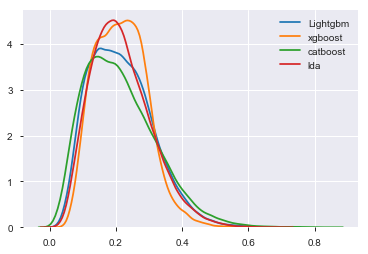

In [135]:
sns.distplot(lgb_test_prob,label="Lightgbm",hist=False)
sns.distplot(xgb_test_prob,label="xgboost",hist=False)
sns.distplot(cb_test_prob,label="catboost",hist=False)
sns.distplot(lda_test_prob,label="lda",hist=False)
plt.legend()
plt.show()

We see catboost have given us best score with auc_score of 0.679846189751701.